In [2]:
# Use the latest code:
require(devtools)
load_all("..")
# OR the installed package:
# require(lucas)

Loading lucas


In [13]:
bdir_deu <- "D:/PROCESSING_RESULTS/2016_06_EARSeL_Symposium_Bonn/EuHD/DEU/LMD"
x <- get_lmd(bdir_deu, "DE", 2012)

-----------------------------------
Data already exists.


In [46]:
n <- nrow(x)
str(x)

'data.frame':	24943 obs. of  132 variables:
 $ POINT_ID            : int  40343108 40363106 40383108 40403106 40423080 40423084 40423102 40423110 40423116 40442998 ...
 $ X_LAEA              : int  4034000 4036000 4038000 4040000 4042000 4042000 4042000 4042000 4042000 4044000 ...
 $ Y_LAEA              : int  3108000 3106000 3108000 3106000 3080000 3084000 3102000 3110000 3116000 2998000 ...
 $ STRATA              : int  1 4 1 1 3 1 6 1 1 3 ...
 $ NUTS0               : chr  "DE" "DE" "DE" "DE" ...
 $ NUTS1               : chr  "DEA" "DEA" "DEA" "DEA" ...
 $ NUTS2               : chr  "DEA2" "DEA2" "DEA2" "DEA2" ...
 $ AREA2               : int  7365 7365 7365 7365 7365 7365 7365 7365 7365 4923 ...
 $ WH                  : num  0.299 0.306 0.299 0.299 0.207 ...
 $ PESO_F2             : num  1.1 4.93 1.1 1.1 1.26 ...
 $ SURV_DATE           : chr  "29/05/2012" "29/05/2012" "29/05/2012" "29/05/2012" ...
 $ OBSERVED            : int  1 1 1 1 1 1 2 1 1 1 ...
 $ OBS_TYPE            : int  1 

## Investigate the transect information

**LUCAS 2012 ( Land Use / Cover Area Frame Survey ) Technical Reference Document : C-1 Instructions for Surveyors General implementation Land Cover and Use** (Chapter 10):

The transect is a imaginary 250 m straight line to East from the LUCAS point. 

The surveyor has to walk along the transect and record each land cover transition that he observes using the standard LC code according to the LUCAS classification, and the occurrence of linear features as defined in chapter 10.1.

The general rule is that all features wider than 3 m are land cover features coded with standard LC codes and all features wider than 1m but narrower than 3 m are coded with Linear Features codes (see chapter 10.1). Electric lines and other air cables, ditches, walls and fences are to be coded regardless of their width.

If the land cover observed on the transect line requires the application of the extended window of observation, i.e. in CXX, DXX, EXX and HXX categories, the surveyor shall observe within a buffer of 20m around the transect to enable decision-making. If the transect crosses a harvested field, and the crop is recognisable by residuals, the crop is to be coded.

Normally the transect begins with the first land cover code of the point (see exception in chapter 10.5).
If two land cover types (LC1 and LC2) have been observed at the point, the transect starts with LC1 followed by LC2 and then the next observed LC.

First the linear features to be observed are presented followed by the detailed instructions for the observation.

In [54]:
cols_tr <- colnames(x)[grep("^TR[0-9]", colnames(x))]
xtr <- x[, cols_tr]
xtr[xtr==""] <- NA

Check if the first transcts normally begin with LC1 and LC2.

In [53]:
has_LC2 <- !x$LC2=="8"; sum(has_LC2)/n
# ...

[1] 0.0205268

Get the number of transitions. 

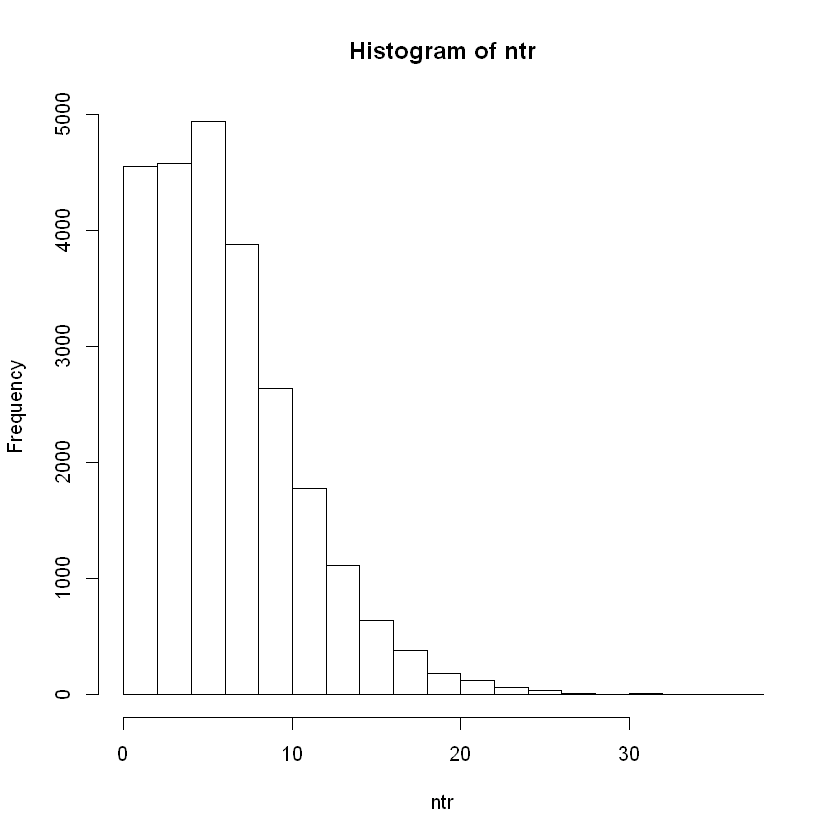

In [65]:
ntr <- ncol(xtr)-rowSums(is.na(xtr))
hist(ntr)
x[, "nTR"] <- ntr

In [78]:
length(grep("[B-H]", x$LC1))
length(grep("A", x$LC1))

[1] 23114

[1] 1829

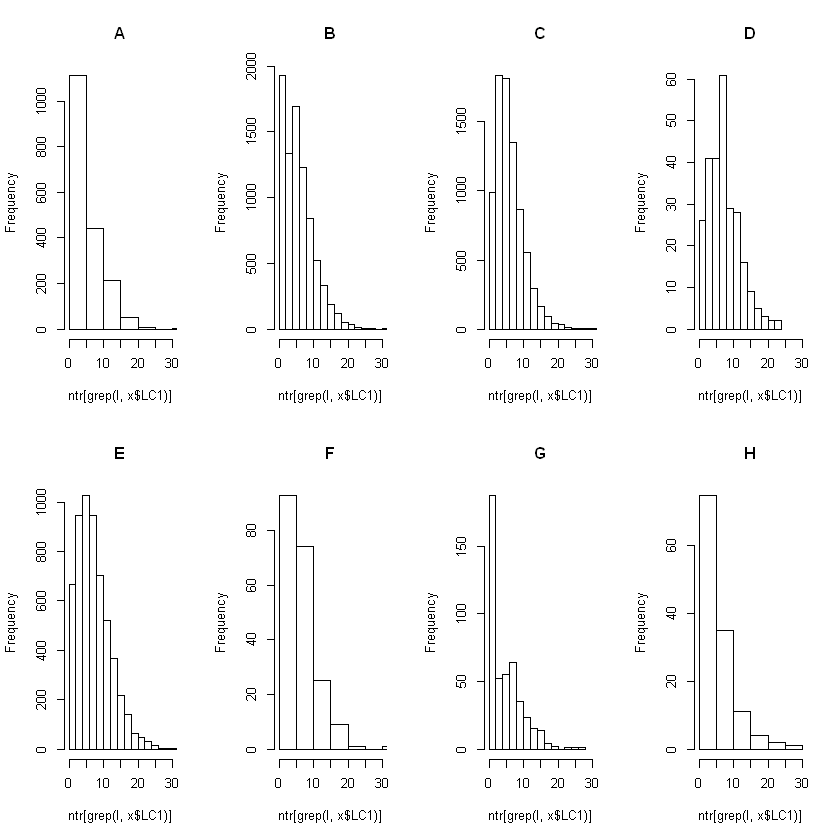

In [85]:
par(mfrow=c(2, 4))
ans <- sapply(LETTERS[1:8], function(l) hist(ntr[grep(l, x$LC1)], main=l, xlim=c(0, 30)))

Visualize the higher level classes.

In [87]:
unique(xtr)

Warning message:
In `[<-.factor`(`*tmp*`, ri, value = "<e2><8b><b1>"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "<e2><8b><b1>"): invalid factor level, NA generated

,TR1,TR2,TR3,TR4,TR5,TR6,TR7,TR8,TR9,TR10,ellip.h,TR71,TR72,TR73,TR74,TR75,TR76,TR77,TR78,TR79,TR80
1,A,C10,62,01,62,11,61,F40,NA,NA,<8b>,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,C10,32,02,61,C10,NA,NA,NA,NA,NA,<8b>,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,B11,61,31,C10,A,62,01,62,01,B22,<8b>,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,A,C10,A,NA,NA,NA,NA,NA,NA,NA,<8b>,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,B11,E30,B16,NA,NA,NA,NA,NA,NA,NA,<8b>,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,B22,11,E20,02,61,01,23,E20,NA,NA,<8b>,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,A*,NA,NA,NA,NA,NA,NA,NA,NA,NA,<8b>,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,B13,B22,NA,NA,NA,NA,NA,NA,NA,NA,<8b>,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
9,E20,23,E20,E30,32,C10,23,E20,23,C10,<8b>,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10,E20,23,E20,23,C10,NA,NA,NA,NA,NA,<8b>,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
